In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1000, 20000)


Text(0.5, 1.0, 'microstate evolution')

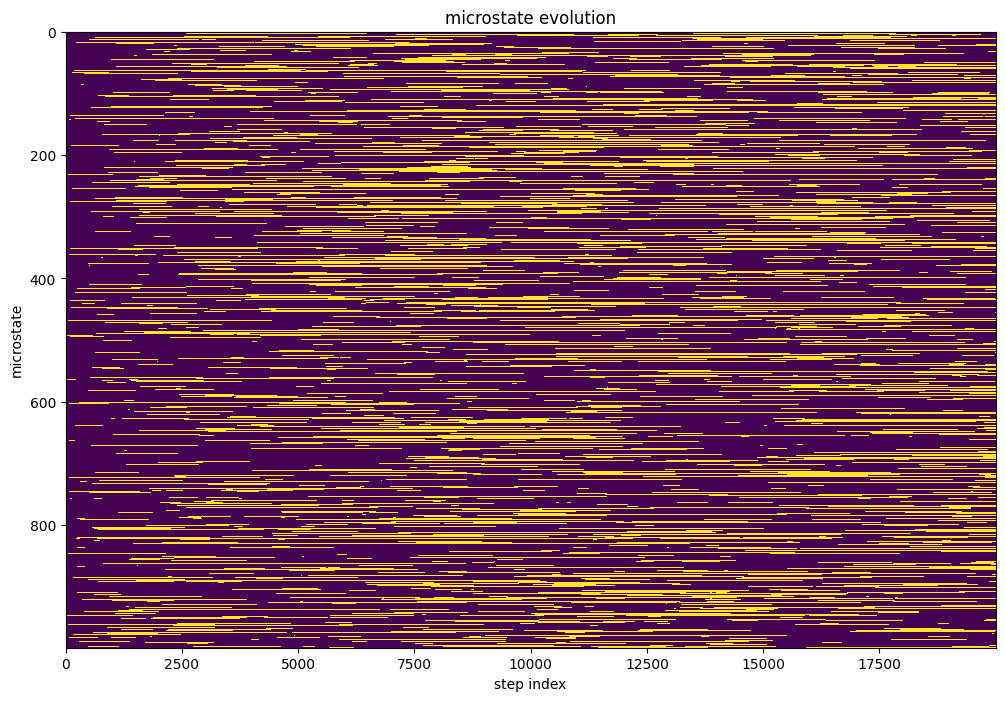

In [10]:
k = 8.6173e-5     # eV / K
T = 1.0*298.      # K. temperature
kT = k*T          # eV
dE = 0.0257       # eV room temp
N = 1000          # number of atoms

microstate = np.zeros([N],int) # initial microstate
E = dE*np.sum(microstate)      # inital energy

Ei = []        # internal energy versus step index
Ei.append(E)  # MC walk thru microstates

steps = 20000
arry = np.zeros( (N,steps), dtype=int)
print(arry.shape)
for istep in range(steps):

    i = np.random.randint(0,N) # choose particle

    if np.random.ranf() < 0.5: # choice up, down
        if microstate[i] == 1:
           microstate[i] = 0
           E -= dE
    else:
        if microstate[i] == 0:
           if np.random.ranf() < np.exp(-dE/kT):
              microstate[i] = 1
              E += dE
    Ei.append(E)

    arry[:,istep:istep+1] = microstate.reshape(-1, 1)

plt.figure(figsize=(12,8))
plt.imshow(arry, cmap='viridis', interpolation='nearest', aspect='auto')
plt.xlabel('step index')
plt.ylabel('microstate')
plt.title('microstate evolution')

microstates, n1, n2, int. energy 1.07e+301 725 275 9.446976982275663


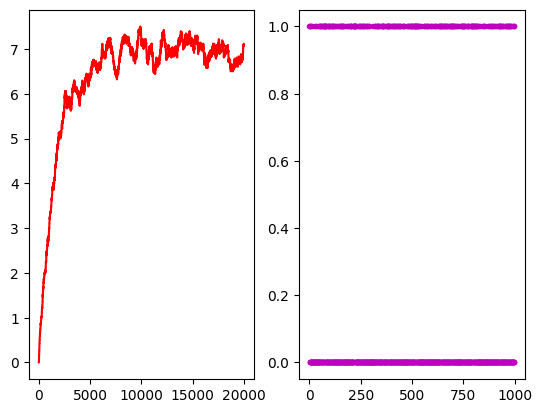

In [3]:
plt.subplot(1, 2, 1)
plt.plot(Ei,"r-")
plt.subplot(1, 2, 2)
plt.plot(microstate,"m.")
print("microstates, n1, n2, int. energy " f"{2**1000:.2e}", N-np.sum(microstate), np.sum(microstate), N*dE*np.exp(-dE/kT) )

1000 0.025679554 12.839777


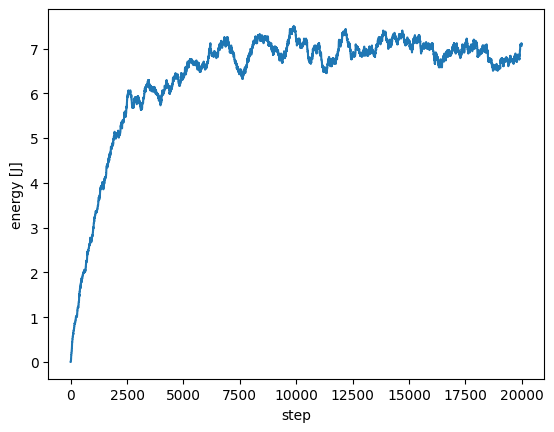

In [4]:
# plot internal energy versus microstate step
plt.plot(Ei)
plt.xlabel("step")
plt.ylabel("energy [J]")
print( N, kT, 0.5*N*kT)

[1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 

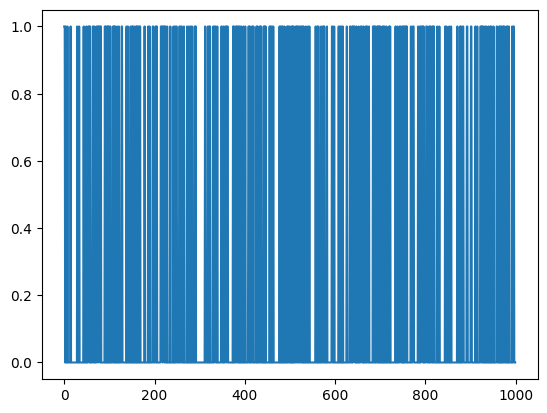

In [5]:
print(microstate)
plt.plot(microstate)

Text(0, 0.5, 'occupancy')

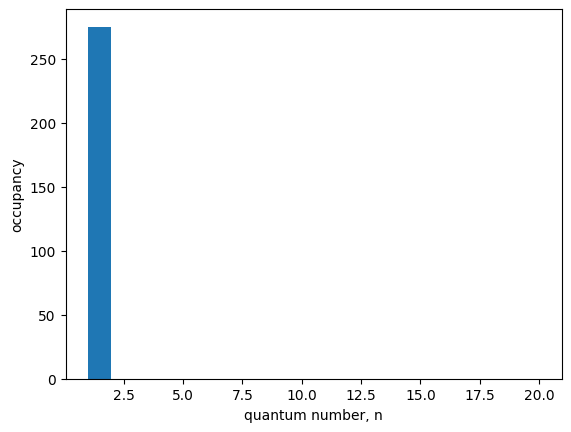

In [6]:
plt.hist(microstate, bins=20, range=(1,20))
plt.xlabel("quantum number, n")
plt.ylabel("occupancy")